In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [39]:
#Reading the csv file and performing data preprocessing
data = pd.read_csv('./Admission_Predict.csv')
data = data.dropna()
data = data.drop_duplicates()
print(data)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1    

In [40]:
#Separating features and target variables
x = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA', 'Research']]
y = data['Chance of Admit ']

In [41]:
#Training the model on training data (after train-test split)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
#Evaluating the model on testing data
y_pred = model.predict(x_test)
MSE = ((y_test-y_pred)**2).mean(axis=0)
R2 = r2_score(y_test,y_pred)
print("MSE: ",MSE,"\nR2: ",R2)

MSE:  0.0038285071249999957 
R2:  0.8264497746197152


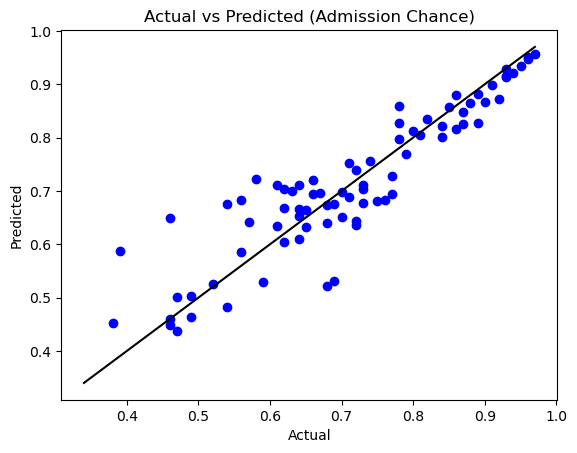

In [43]:
#Plot for visualization
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Admission Chance)')
plt.show()

In [44]:
GRE = int(input("Enter GRE Score (out of 340): "))
TOEFL = int(input("Enter TOEFL Score (out of 120): "))
uni_rating = float(input("Enter University Rating (out of 5): "))
SOP = float(input("Enter strength of SOP (out of 5): "))
LOR = float(input("Enter strength of LOR (out of 5): "))
CGPA = float(input("Enter Undergraduate GPA (out of 10): "))
isResearch = int(input("Enter Research Experience (either 0 or 1): "))

input_data = [[GRE,TOEFL,uni_rating,SOP,LOR,CGPA,isResearch]]
print("Chances of Admission: ",model.predict(input_data)[0])

Chances of Admission:  0.7730000000000001


/home/spidey/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
